In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.patches as mpatches


In [192]:
df = pd.read_csv('source/FReDA4.csv')

In [193]:
couple_ticks = ["Satisfied", "Deprived: Both partners", "Deprived: One partner",
                "Saturated: Both partners", "Saturated: One partner", "Mixed"]

couple_order = ["Couple Agreement", "Couple Deprivation", "One-sided Deprivation",
                "Couple Saturation", "One-sided Saturation", "Couple Disagreement"]

order = ["Couple Deprivation", "One-sided Deprivation", "Couple Saturation",
         "One-sided Saturation", "Couple Disagreement"]

short_palette = [
    "#4DB6AC", "#00695C",
    "#7986CB", "#3949AB",
    "#B76A8D"
]
yes_no_palette = ["#F4A582", "#A59DFF"]

# palette = [
# "#D18CA6",             # Group 1
#     "#66C1BC", "#4DB6AC", "#00897B", "#00695C",  # Group 2
#     "#9FA8DA", "#7986CB", "#5C6BC0", "#3949AB"
# ]

new_palette = [
    "#4DB6AC", "#00897B", "#00695C",  # Group 2
    "#7986CB", "#5C6BC0", "#3949AB",  # Group 3
    "#D18CA6", "#B76A8D",  # Group 1
]


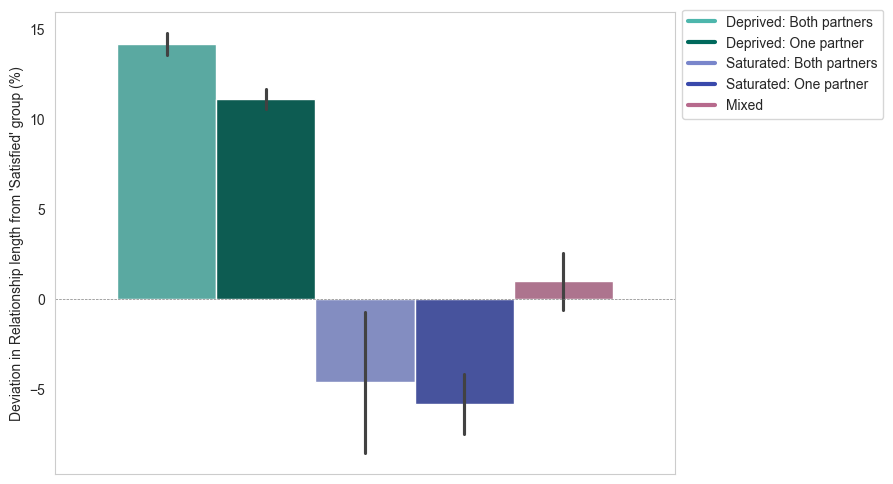

In [194]:
traits = [
    "Relationship Length",
]
t = traits[0].split()[0]

df_couple = df.melt(
    id_vars=["Group2", "Wish for Touch"],
    value_vars=traits,
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group2"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

mean_baseline = (
    df_couple
    .loc[df_couple["Group2"] == "Couple Agreement", "Score"]
    .mean()
)

df_plot = (
    df_couple
    .assign(
        Deviation=lambda x: x["Score"] - mean_baseline,
        Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
    )
    .query("Group2 != 'Couple Agreement'")
    .assign(Group2=lambda x: pd.Categorical(x["Group2"], categories=order, ordered=True))
)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_plot,
    x="Trait",
    y="Deviation_pct",
    hue="Group2",
    errorbar="se",
    palette=short_palette
)
plt.ylabel("")
plt.xlabel("")

handles = [
    plt.Line2D([0], [0], color=short_palette[i], lw=3, label=couple_ticks[1:][i])
    for i in range(len(couple_ticks[1:]))
]

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1.0, 1.02), labels=couple_ticks[1:])
plt.ylabel("Deviation in Relationship length from 'Satisfied' group (%)")
plt.xticks([])

ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.grid(False)

plt.savefig(f'output/img_bg/alles/{traits[0]}.png', dpi=600, transparent=False, bbox_inches='tight')

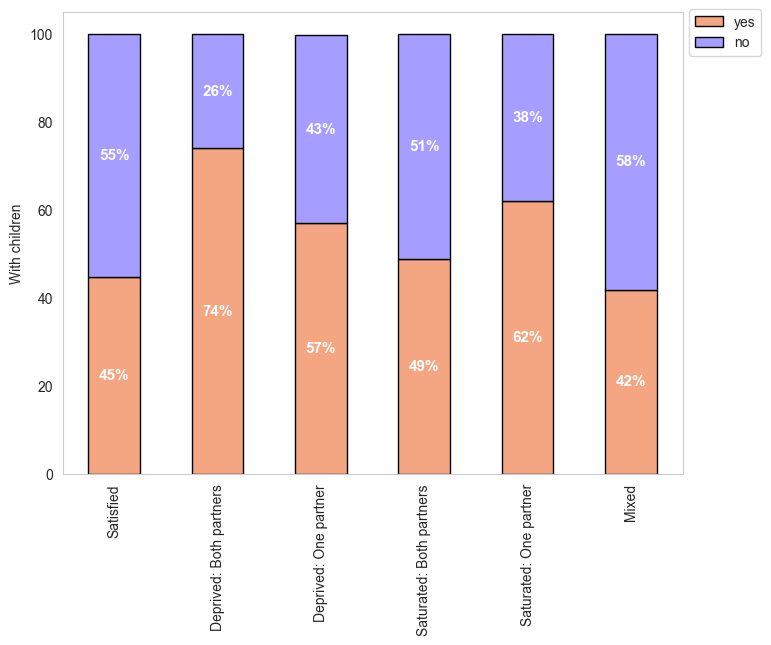

In [207]:
order = ["Couple Agreement", "Couple Deprivation", "One-sided Deprivation",
         "Couple Saturation", "One-sided Saturation", "Couple Disagreement"]

target = 2

traits = [
    "Married",
    "Cohabitation",
    "Kids"
]
name = ["Married", "Cohabiting", "With children"]

t = traits[target].split()[0]

df_couple = df.melt(
    id_vars=["Group2", "Wish for Touch"],
    value_vars=traits[target],
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group2"], observed=True)
    .agg(
        yes=("Score", lambda s: 100 * (s > 0).mean()),
        no=("Score", lambda s: 100 * (s < 1).mean()),
        # total=("Score", lambda s: 100),
    )
    .reset_index()
)
df_couple_summ['Group2'] = pd.Categorical(df_couple_summ['Group2'], order)
df_couple_summ.sort_values("Group2")

ax = df_couple_summ.plot(
    kind='bar',
    stacked=True,
    color=yes_no_palette,
    figsize=(8, 6),
    edgecolor='black',
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center',
                 color='white', fontsize=11, fontweight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.02))

# plt.ylabel("")
# plt.xlabel("")
plt.grid(False)
plt.xticks([0, 1, 2, 3, 4, 5], labels=couple_ticks, rotation=90)
y = plt.ylabel(f"{name[target]}")
plt.savefig(f'output/img_bg/alles/{t}.png', dpi=600, transparent=False, bbox_inches='tight')

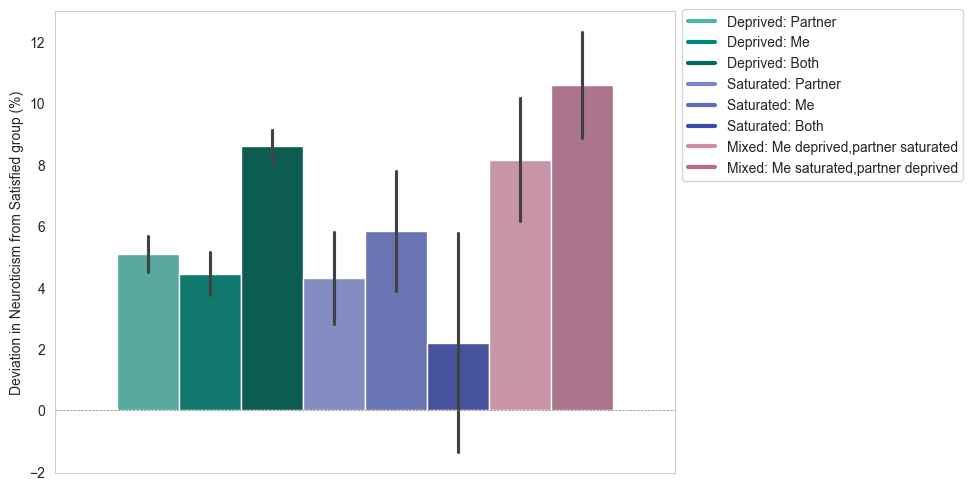

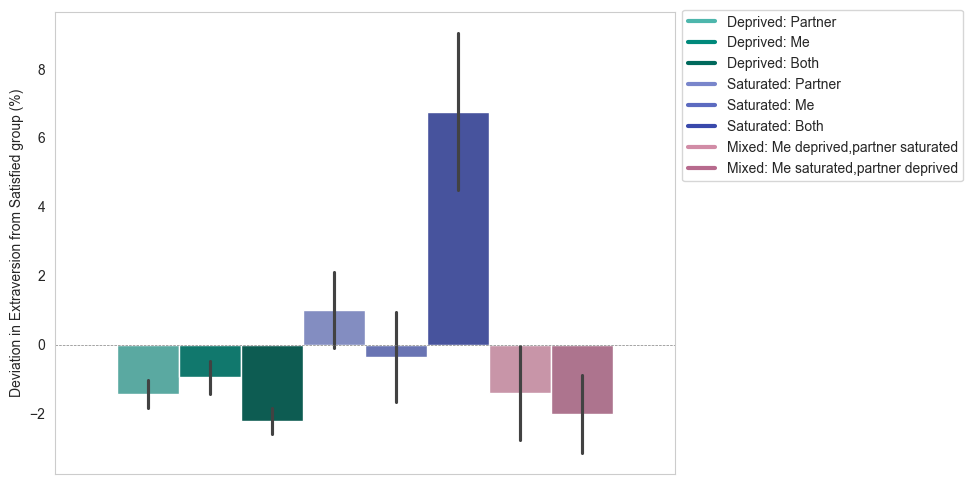

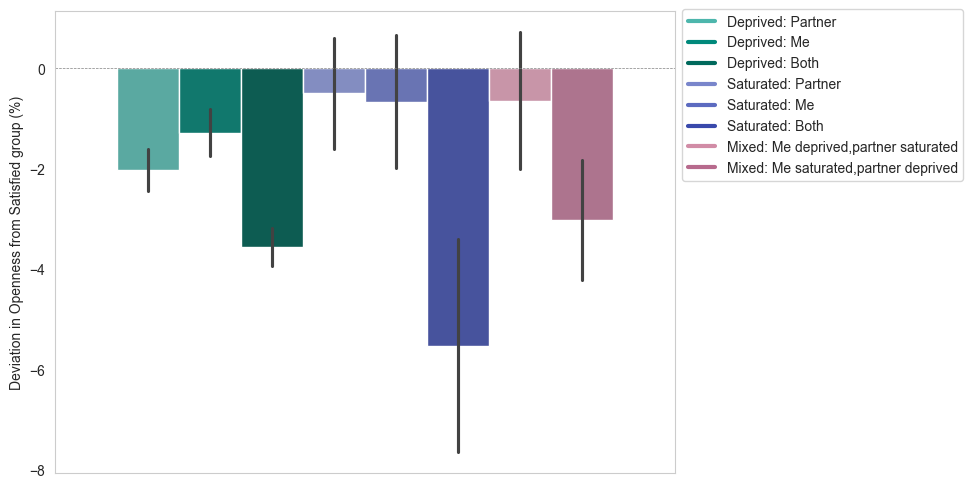

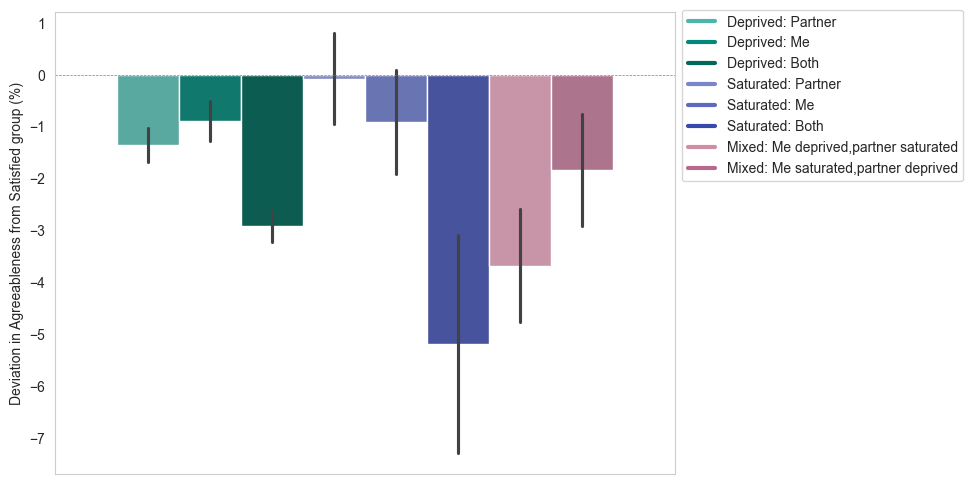

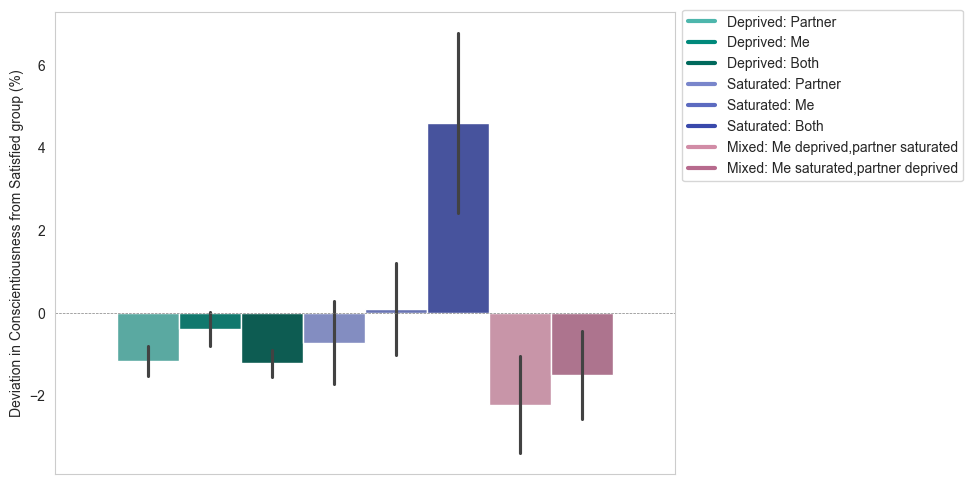

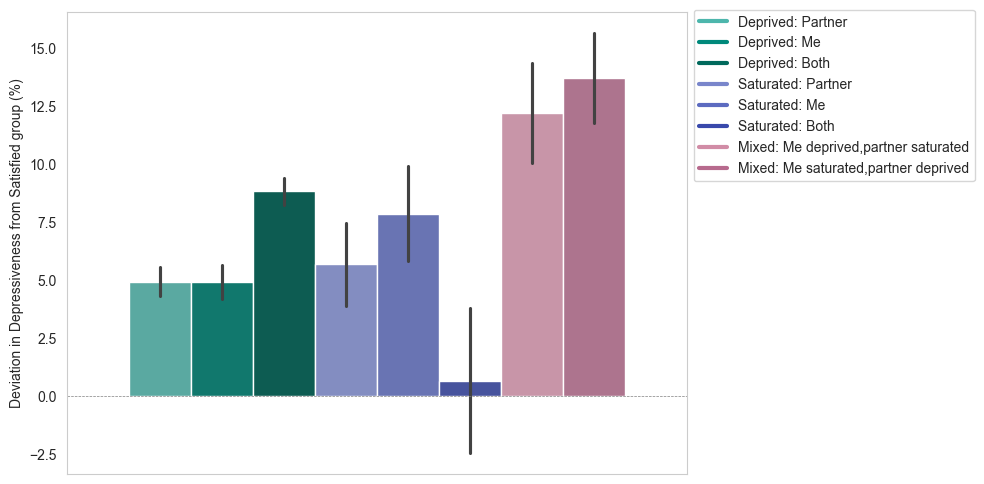

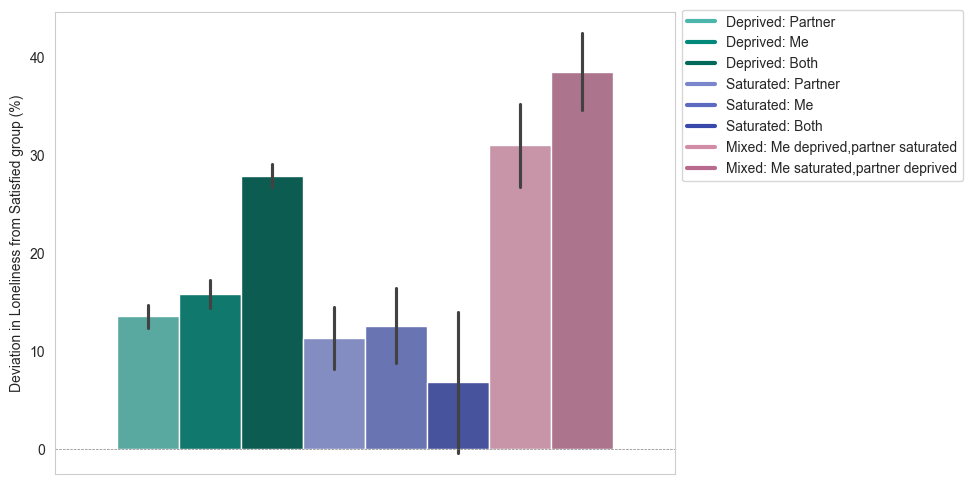

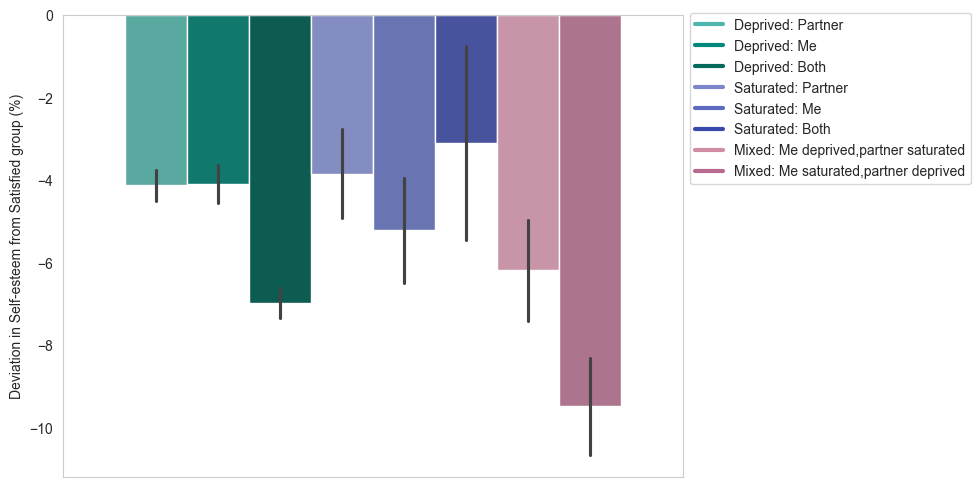

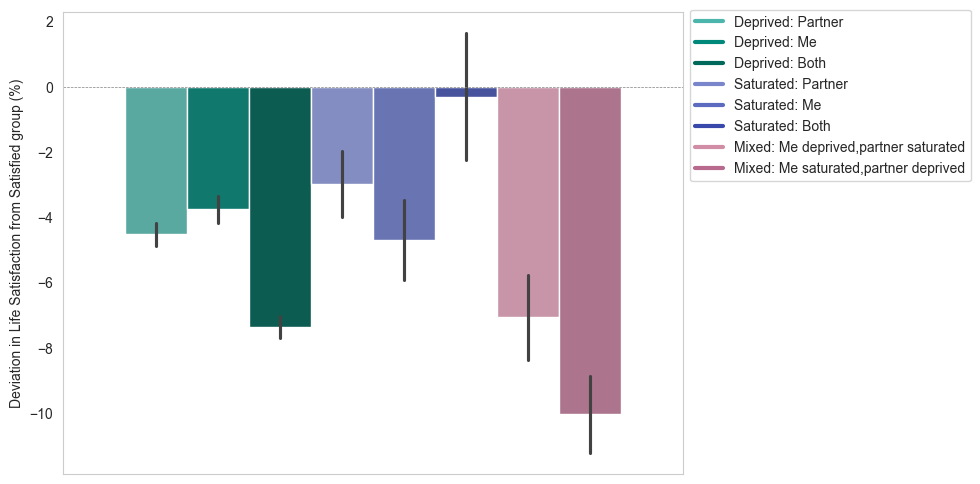

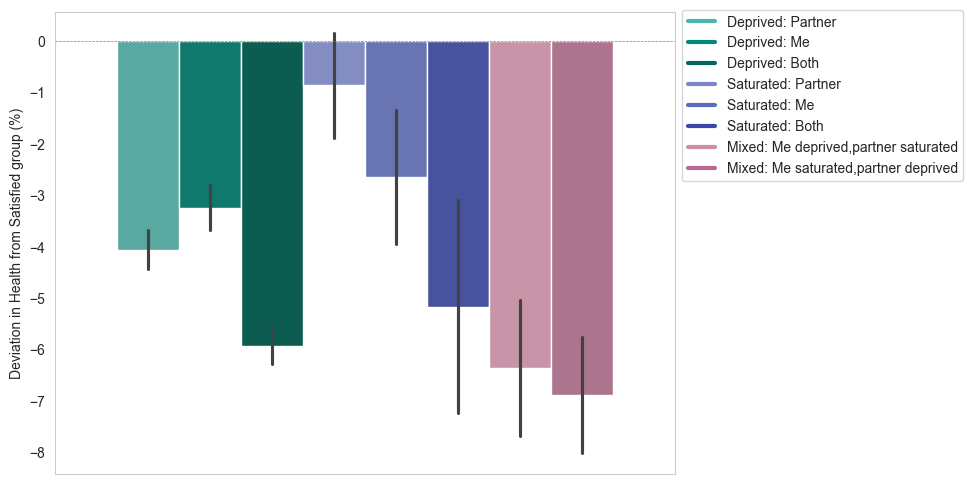

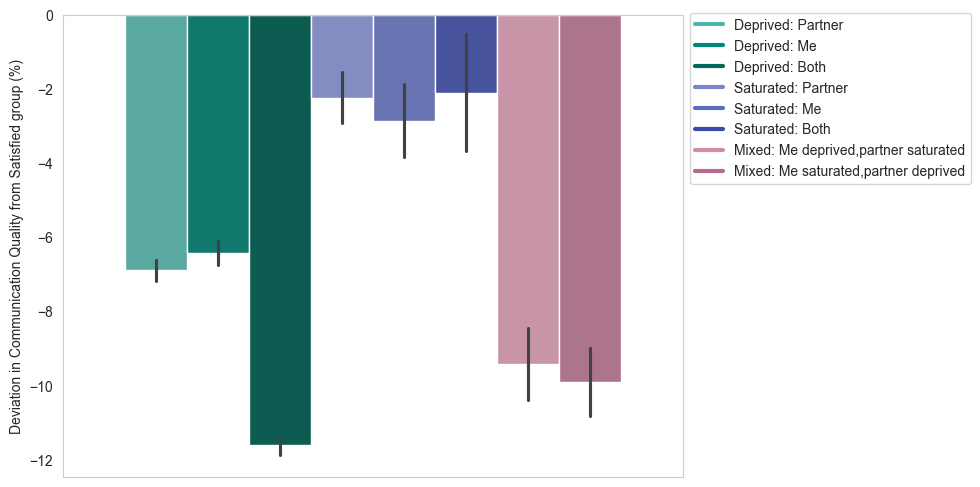

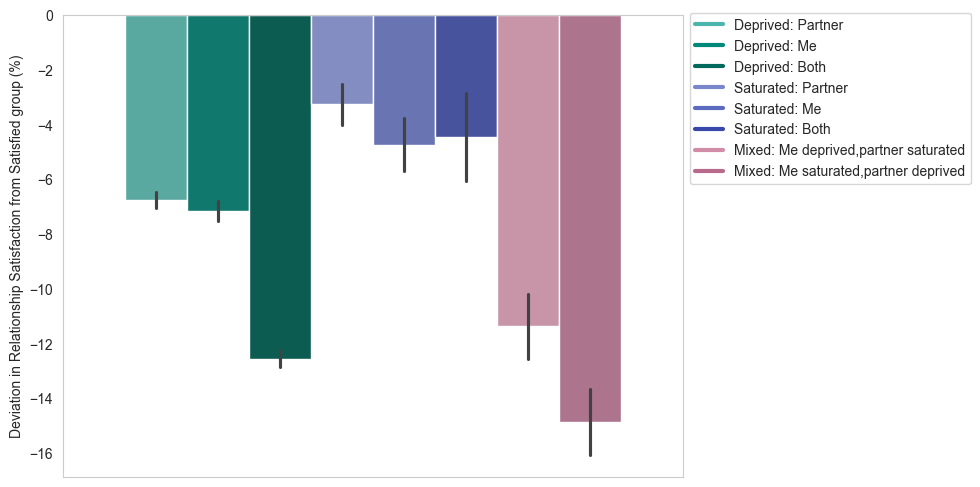

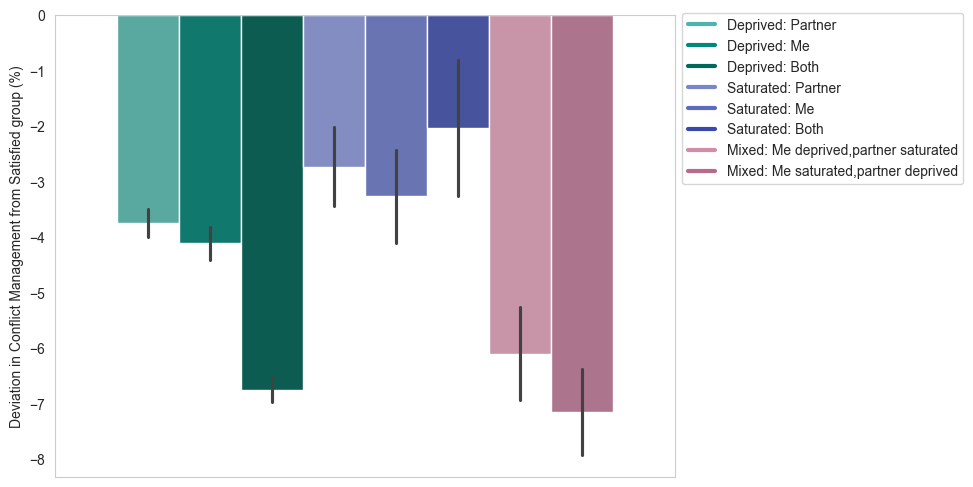

In [196]:
traits = [
    # "Age",
    # "Sex",
    # "Work Status",
    "Neuroticism",
    "Extraversion",
    "Openness",
    "Agreeableness",
    "Conscientiousness",
    "Depressiveness",
    "Loneliness",
    "Self-esteem",
    "Life Satisfaction",
    "Health",
    "Communication Quality",
    "Relationship Satisfaction",
    "Conflict Management",
]
for trait in traits:
    t = trait.split()[0]

    df_couple = df.melt(
        id_vars=["Group1"],
        value_vars=trait,
        var_name="Trait",
        value_name="Score"
    )

    df_couple_summ = (
        df_couple
        .groupby(["Trait", "Group1"], observed=True)["Score"]
        .agg(['mean', 'std', 'median'])
        .reset_index()
    )

    mean_baseline = (
        df_couple
        .loc[df_couple["Group1"] == "SubGroup1", "Score"]
        .mean()
    )

    df_plot = (
        df_couple
        .assign(
            Deviation=lambda x: x["Score"] - mean_baseline,
            Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
        )
        .query("Group1 != 'SubGroup1'")
    )

    group_order = ["SubGroup7", "SubGroup2", "SubGroup3",
                   "SubGroup8", "SubGroup5", "SubGroup6",
                   "SubGroup4", "SubGroup9"]

    colors = sns.color_palette('Set3', 8)
    plt.figure(figsize=(8, 6))

    group_labels = [
        'Deprived: Partner', 'Deprived: Me', 'Deprived: Both',
        'Saturated: Partner', 'Saturated: Me', 'Saturated: Both',
        'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
    ]

    ax = sns.barplot(
        data=df_plot,
        x="Trait",
        y="Deviation_pct",
        hue="Group1",
        hue_order=group_order,  # alphabetical
        errorbar="se",
        palette=new_palette,
        # width=0.6
    )
    means = (
        df_plot.groupby("Group1", observed=True)["Deviation_pct"]
        .mean()
        .round(2)
    )
    #
    # for i, (group, mean) in enumerate(means.items()):
    #     plt.text(i, mean + 1, f"{mean:.1f}%", ha='center', va='bottom')

    handles = [
        plt.Line2D([0], [0], color=new_palette[i], lw=3, label=group_labels[i])
        for i in range(len(group_labels))
    ]
    plt.legend(handles=handles, labels=group_labels, loc='upper left', bbox_to_anchor=(1.0, 1.02))

    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])
    y = plt.ylabel(f"Deviation in {trait} from Satisfied group (%)")

    ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
    plt.grid(False)

    plt.savefig(f'output/img_bg/alles/{t}.png', dpi=600, transparent=False, bbox_inches='tight')
